**It is a truth universally acknowledged, that a bookworm in possession of a data scientist's quill, must be in want of literary escapades.**

Good day, dearest readers! 

With quills at the ready, let us embark on a venture reminiscent of the grand balls and social intricacies of Jane Austen's novels to find the words that make a frequent appearance in the halls of Pemberley.

Our companion on this literary journey? None other than the timeless Pride and Prejudice.

**An Invitation to Neuralfield Ball**

First things first, let's import the required Python modules.

In [1]:
# Importing requests, BeautifulSoup, nltk, and Counter
import requests
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lekha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lekha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


We're using requests to get the digital manuscript of Pride and Prejudice from Project Gutenberg. We are making a get request to the website (URL) to fetch the data we need.

In [6]:
# Request Book
r = requests.get('https://www.gutenberg.org/cache/epub/42671/pg42671-images.html')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[0:2000])

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"><style>
#pg-header div, #pg-footer div {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    margin-left: 2em;
}
#pg-footer div.agate {
    font-size: 90%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-footer li {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    text-indent: -0.6em;
}
#pg-footer div.secthead {
    font-size: 110%;
    font-weight: bold;
}
#pg-footer #project-gutenberg-license {
    font-size: 110%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-header-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight:bold;
}
#pg-footer-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight: normal;
    margin-top: 0;
    margin-bottom: 0;
}
#pg-header #pg-machine-header p {
    text-indent: -4em;
    margin-left: 4em;
    margin-top:

Here, r.encoding ensures that we interpret the HTML correctly, and we store the HTML content in html for further exploration.

**What Excellent (boiled?) Soup!**

Enter BeautifulSoup! We're using it to parse the HTML content and extract the raw text of Pride and Prejudice; this is what we call Data Wrangling.

In [7]:
# Get the text from the HTML
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()
print(text[1540:8000])


PRIDE & PREJUDICE.

CHAPTER I.
It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.
However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered as the rightful
property of some one or other of their daughters.
"My dear Mr. Bennet," said his lady to him one day, "have you heard that
Netherfield Park is let at last?"
Mr. Bennet replied that he had not.
"But it is," returned she; "for Mrs. Long has just been here, and she
told me all about it."
Mr. Bennet made no answer.
"Do not you want to know who has taken it?" cried his wife impatiently.
"You want to tell me, and I have no objection to hearing it."
This was invitation enough.
"Why, my dear, you must know, Mrs. Long says that Netherfield is taken
by a young man of large fortune from the north of England; that he came
down on Monday in a c

BeautifulSoup(html, "html.parser") creates a BeautifulSoup object, and soup.get_text() retrieves the text from it. It's like getting the plain text from a web page.

**Remove the simpletons**

Let’s break down our text into individual words and remove anything that isn't a word (eg. punctuations), a process known as tokenization. The nltk library helps us with that.

In [8]:
# Extract the words
tokenizer = nltk.tokenize.RegexpTokenizer('\\w+')
tokens = tokenizer.tokenize(text)

# Make the words lowercase
words = [token.lower() for token in tokens]

**A Stop for Tea**

Stop words are the dull party guests of our text. This includes words like 'a', 'the' that do not add anything meaningful.

nltk provides a stopwords list that we can use to remove them and keep only the words that are of interest to us.

In [9]:
# Load in stop words
sw = nltk.corpus.stopwords.words('english')

# Remove stop words
words_ns = [word for word in words if word not in sw]

Here, we load English stop words with nltk.corpus.stopwords.words('english') and then create a new list words_ns excluding these stop words.

**Count the distinguished words**

Finally, we present the most distinguished words!

The Counter class from the collections module helps us count the occurrences of each unique word.

In [10]:
# Initialize a Counter object from our processed list of words
count = Counter(words_ns)

# Store 10 most common words and their counts as top_ten
top_ten = count.most_common(10)

# Print the top ten words and their counts
print(top_ten)

[('mr', 782), ('elizabeth', 634), ('could', 524), ('would', 470), ('darcy', 418), ('said', 402), ('mrs', 343), ('much', 329), ('bennet', 324), ('must', 318)]


We use Counter(words_ns) to create a frequency distribution, count.most_common(10) gives us the top 10 words and their counts, and finally, we print them.

**Presenting the most noted words**  

Now, let's visualize! We're creating a word cloud using the wordcloud library and matplotlib.

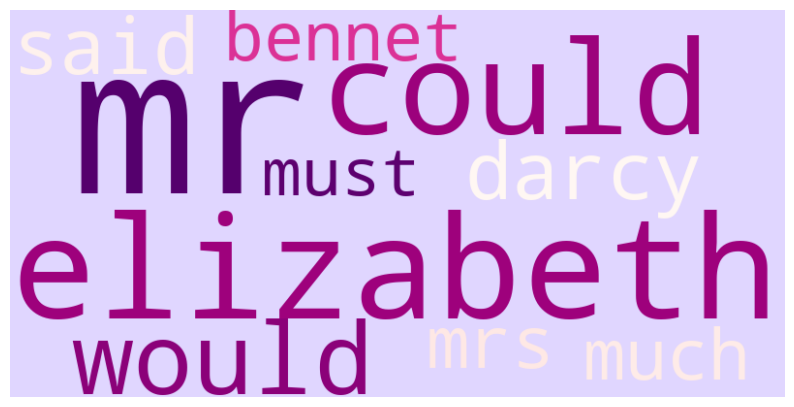

In [34]:
# Visualize word frequency with a Pride and Prejudice-themed word cloud
wordcloud = WordCloud(width=800, height=400, background_color='#e0d6ff', colormap="RdPu").generate_from_frequencies(dict(top_ten))

# Display the word cloud with a soft Regency touch
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
##plt.title('Most noted words of Pride and Prejudice', fontsize=16, color='darkslategray')
plt.show()